In [1]:
%matplotlib inline

import geopandas as gpd
import pandas as pd
import cartopy.crs as ccrs
from lib.funcs import *
from lib.mapping import *

In [2]:
recorte_maior = gpd.read_file('./data/BASES/limite_recorte/limite_recorte_maior.shp')
recorte_menor = gpd.read_file('./data/BASES/limite_recorte/limite_recorte_menor.shp')
limite_mun = gpd.read_file('./data/BASES/limite_municipio/limite_municipio.shp')
lotes_empreendimentos = gpd.read_file('./data/BASES/empreendimento/empreendimento.shp')
bairros_recorte_menor = gpd.read_file("./data/BASES/bairros/bairros_recorte_menor.shp")
bairros_recorte_maior = gpd.read_file("./data/BASES/bairros/bairros_recorte_maior.shp")
avenidas = gpd.read_file('./data/BASES/AVENIDAS/avenidas.shp')

renda_setores = gpd.read_file('./data/RENDA/setores_recorte.shp')
renda_bairros = gpd.read_file('./data/RENDA/bairros.shp')

limite_mun = gpd.read_file("./data/BASES/limite_municipio/limite_municipio.shp")

lotes_empreendimentos = lotes_empreendimentos.to_crs(epsg=3857)
bairros_recorte_maior = bairros_recorte_maior.to_crs(epsg=3857)
bairros_recorte_menor = bairros_recorte_menor.to_crs(epsg=3857)

In [3]:
bairros_recorte_maior = bairros_recorte_maior.merge(renda_bairros, on='NM_BAIRRO', suffixes=('_y', ''))
bairros_recorte_maior.drop(bairros_recorte_maior.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

In [4]:
lotes_empreendimentos = lotes_empreendimentos.reindex([1, 0, 2])
lotes_empreendimentos['Name'] = lotes_empreendimentos.index+1
lotes_empreendimentos['coords'] = lotes_empreendimentos['geometry'].apply(lambda x: x.centroid.coords[:])
lotes_empreendimentos['coords'] = [coords[0] for coords in lotes_empreendimentos['coords']]

In [5]:
borders = [recorte_maior, recorte_menor]

/home/fc-anjos/.local/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:761: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7ffa59beaf40> with the PlateCarree projection.
  warnings.warn('Approximating coordinate system {!r} with the '


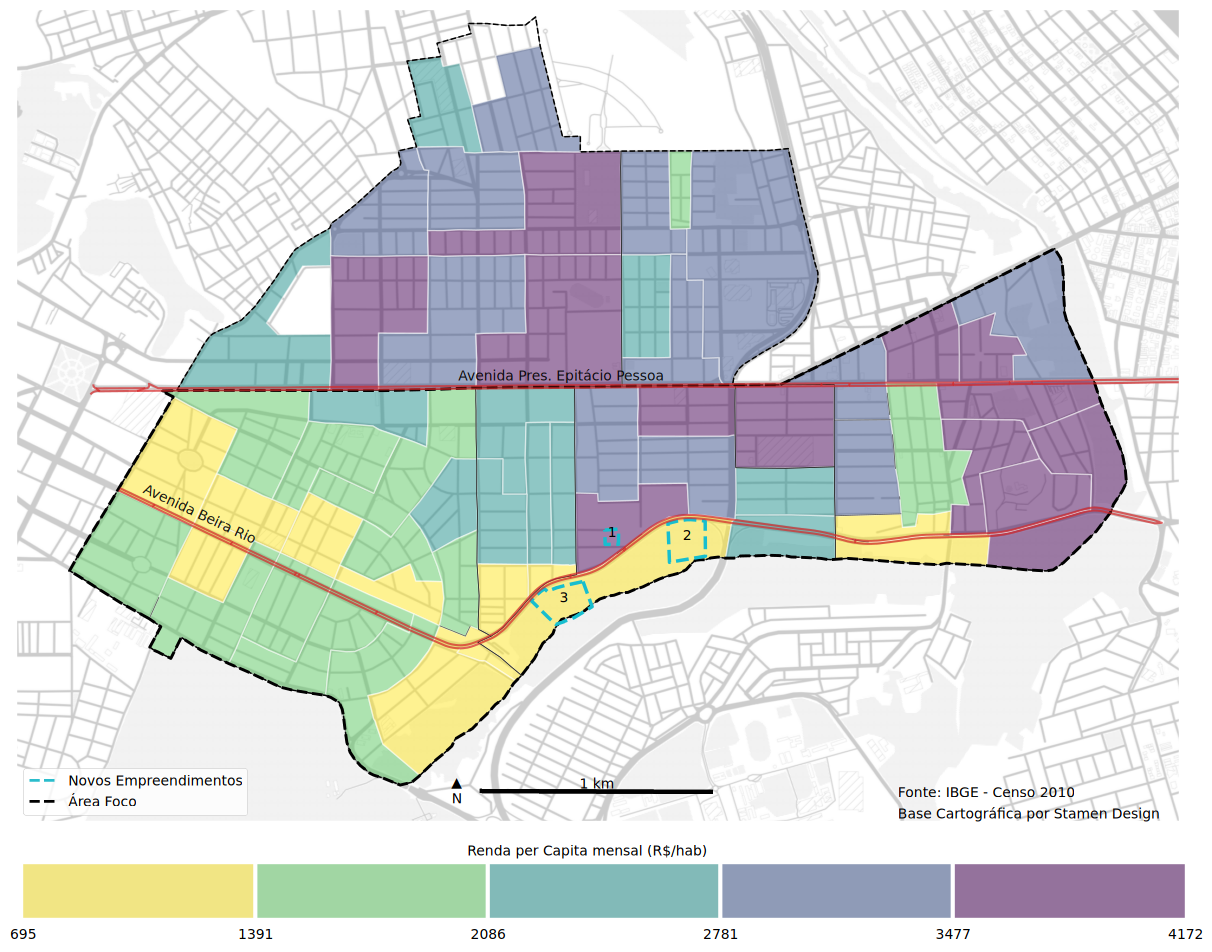

In [7]:
plot_qualitative(renda_setores, 
                 'renda_per_',
                 5,
                 0.5,
                 [recorte_maior, recorte_menor],
                 avenidas,
                 lotes_empreendimentos,
                 bairros_recorte_maior,
                 .075,
                 .175,
                 'RENDA/renda_per_capita_recorte', 
                 (630, 90), 
                 (630, 75), 
                 (320, 48),
                 16, 
                 'Renda per Capita mensal (R$/hab)',
                 legend_y = 0.07,
                 scale_extension=1,
                 factor_left=1,
                 factor_right=1,
                 factor_bottom=1,
                 factor_top=1,
                 annotate_bairros=False,
                 annotate_lotes=True,
                 plot_avenidas=True)

In [ ]:
plot_quantitative(renda_setores, 
                 'renda_por_',
                 5,
                 0.5,
                 [recorte_maior, recorte_menor],
                 avenidas,
                 lotes_empreendimentos,
                 bairros_recorte_maior,
                 .075,
                 .175,
                 'RENDA/renda_por_trabalhador_recorte', 
                 (630, 85), 
                 (630, 70), 
                 (320, 48),
                 16, 
                 'Renda Mensal por Trabalhador (R$/hab)',
                 legend_y = 0.07,
                 scale_extension=1,
                 factor_left=1,
                 factor_right=1,
                 factor_bottom=1,
                 factor_top=1,
                 annotate_bairros=False,
                 annotate_lotes=True,
                 plot_avenidas=True)

In [ ]:
plot_quantitative(bairros_recorte_maior, 
                 'renda_per_',
                 5,
                 0.5,
                 [recorte_maior, recorte_menor],
                 avenidas,
                 lotes_empreendimentos,
                 bairros_recorte_maior,
                 .075,
                 .185,
                 'RENDA/renda_per_capita_recorte_por_bairro', 
                 (630, 90), 
                 (630, 75), 
                 (320, 48),
                 16, 
                 'Renda per Capita mensal (R$/hab)',
                 legend_y = 0.05,
                 scale_extension=1,
                 factor_left=1,
                 factor_right=1,
                 factor_bottom=1.1,
                 factor_top=1,
                 annotate_bairros=True,
                 annotate_lotes=True,
                 plot_avenidas=True)

In [ ]:
plot_quantitative(bairros_recorte_maior, 
                 'renda_por_',
                 5,
                 0.5,
                 [recorte_maior, recorte_menor],
                 avenidas,
                 lotes_empreendimentos,
                 bairros_recorte_maior,
                 .075,
                 .185,
                 'RENDA/renda_por_trabalhador_recorte_por_bairro', 
                 (630, 90), 
                 (630, 75), 
                 (320, 48),
                 16, 
                 'Renda per Capita mensal (R$/hab)',
                 legend_y = 0.05,
                 scale_extension=1,
                 factor_left=1,
                 factor_right=1,
                 factor_bottom=1.1,
                 factor_top=1,
                 annotate_bairros=True,
                 annotate_lotes=True,
                 plot_avenidas=True)

In [ ]:
plot_quantitative(renda_bairros, 
                 'renda_per_',
                 5,
                 0.5,
                 [limite_mun, recorte_menor], 
                 avenidas,
                 lotes_empreendimentos,
                 bairros_recorte_menor,
                 .075,
                 .175,
                 'RENDA/renda_per_capita_centro', 
                 (630, 85), 
                 (630, 70), 
                 (320, 48),
                 14, 
                 'Renda per Capita mensal (R$/hab)', 
                 scale_extension=2,
                 legend_y = 0.03,
                 factor_left=0.5,
                 factor_right=0.7,
                 factor_bottom=0.05,
                 annotate_lotes=False,
                 factor_top=0.7)

In [ ]:
plot_quantitative(renda_bairros, 
                 'renda_por_',
                 5,
                 0.5,
                 [limite_mun, recorte_menor], 
                 avenidas,
                 lotes_empreendimentos,
                 bairros_recorte_menor,
                 .075,
                 .175,
                 'RENDA/renda_por_trabalhador_centro', 
                 (630, 85), 
                 (630, 70), 
                 (310, 48),
                 14, 
                 'Renda Mensal por Trabalhador (R$/hab)', 
                 scale_extension=2,
                 legend_y = 0.03,
                 factor_left=0.5,
                 factor_right=0.7,
                 factor_bottom=0.05,
                 annotate_lotes=False,
                 factor_top=0.7)

In [ ]:
plot_quantitative(renda_bairros, 
                 'renda_per_',
                 5,
                 0.5,
                 [limite_mun, recorte_menor],
                 avenidas,
                 lotes_empreendimentos,
                 bairros_recorte_menor,
                 .075,
                 .175,
                 'RENDA/renda_per_capita_cidade', 
                 (630, 95), 
                 (630, 80), 
                 (320, 48),
                 14, 
                 'Renda per Capita mensal (R$/hab)', 
                 scale_extension=2,
                 legend_y = 0.03,
                 factor_left=0.5,
                 factor_right=0.7,
                 factor_bottom=0.05,
                 factor_top=0.7)

In [ ]:
plot_quantitative(renda_bairros, 
                 'renda_por_',
                 5,
                 0.5,
                 [limite_mun, recorte_menor],
                 avenidas,
                 lotes_empreendimentos,
                 bairros_recorte_menor,
                 .075,
                 .175,
                 'RENDA/renda_por_trabalhador_cidade', 
                 (630, 95), 
                 (630, 80), 
                 (320, 48),
                 14, 
                 'Renda Mensal por Trabalhador (R$/hab)', 
                 scale_extension=2,
                 legend_y = 0.03,
                 factor_left=0.5,
                 factor_right=0.7,
                 factor_bottom=0.05,
                 factor_top=0.7)